# Upsampling

upsampling by using 0 insertion and frequency domain filtering

In [1]:
versioninfo()

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


In [2]:
using BenchmarkTools, FFTW, Plots

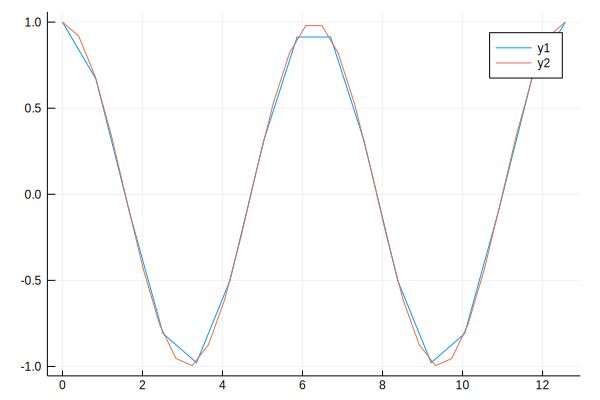

In [3]:
x1  = range(0.0, stop=4π, length=16)
y1  = cos.(x1)
x2  = range(0.0, stop=4π, length=32)
y2  = cos.(x2)
plot(x1, y1)
plot!(x2, y2)

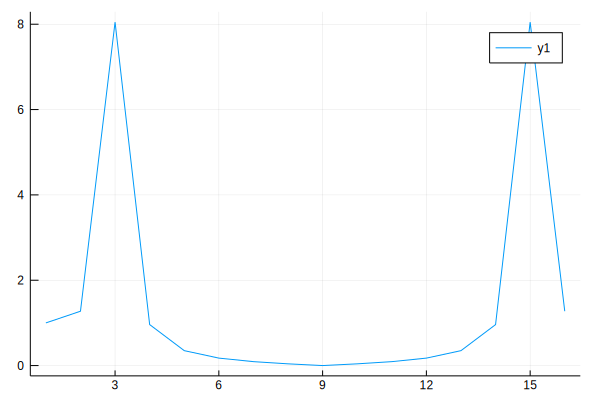

In [4]:
plot(abs.(fft(y1)))

In [5]:
function insertzero(x::AbstractVector, n::Integer)
    ret = zeros(eltype(x), length(x)*n)
    for i in 1:length(x)
        ret[(i-1)*n+1] = x[i]
    end
    ret
end

insertzero (generic function with 1 method)

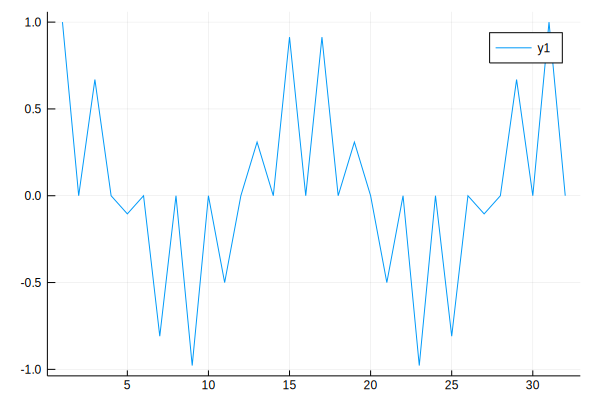

In [6]:
y3 = insertzero(y1, 2)
plot(y3)

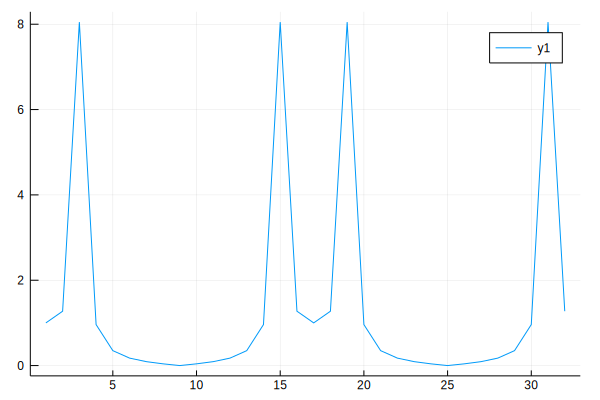

In [7]:
plot(abs.(fft(y3)))

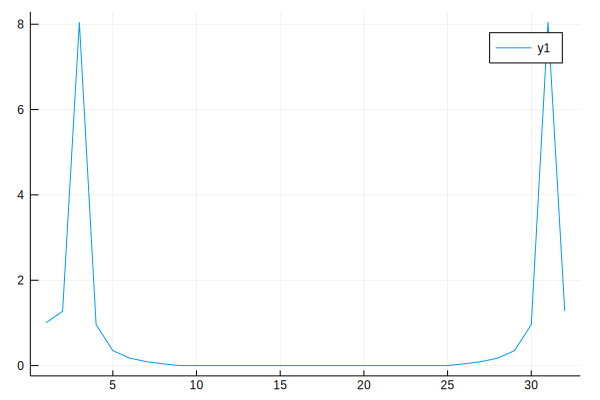

In [8]:
z = fft(y3)
z[cld(length(z), 4)+1:end-cld(length(z), 4)] .= 0
plot(abs.(z))

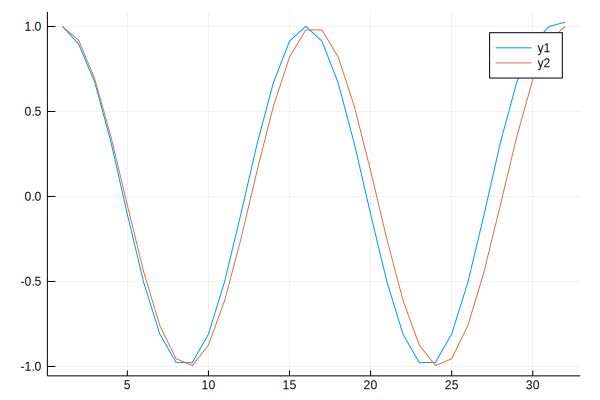

In [9]:
plot(real.(ifft(z)) .* 2)
plot!(y2)

In [10]:
function upsampling(x, n)
    res = insertzero(x, n)
    z   = fft(res)
    z[cld(length(z), 2n)+1:end-cld(length(z), 2n)] .= 0
    real.(ifft(z)) .* n
end

upsampling (generic function with 1 method)

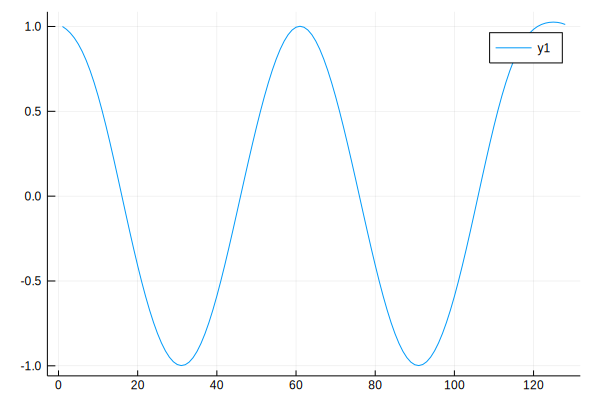

In [11]:
plot(upsampling(y1, 8))

In [12]:
xbench = range(0.0, stop=4π, length=256)
ybench = cos.(xbench)
@btime(upsampling($ybench, 8));

  34.481 μs (118 allocations: 134.92 KiB)
